In [96]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [97]:
tf.random.set_seed(123456)

In [98]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [99]:
data_dir= "./Images/"

70% Training data
30% Validation data

In [100]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    shuffle=True,
    seed=123456,
    image_size= IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 4920 files belonging to 2 classes.
Using 3444 files for training.


In [101]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    shuffle=True,
    seed=123456,
    image_size= IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 4920 files belonging to 2 classes.
Using 1476 files for validation.


In [102]:
class_names = train_dataset.class_names
print(class_names)

['glasses', 'no_glasses']


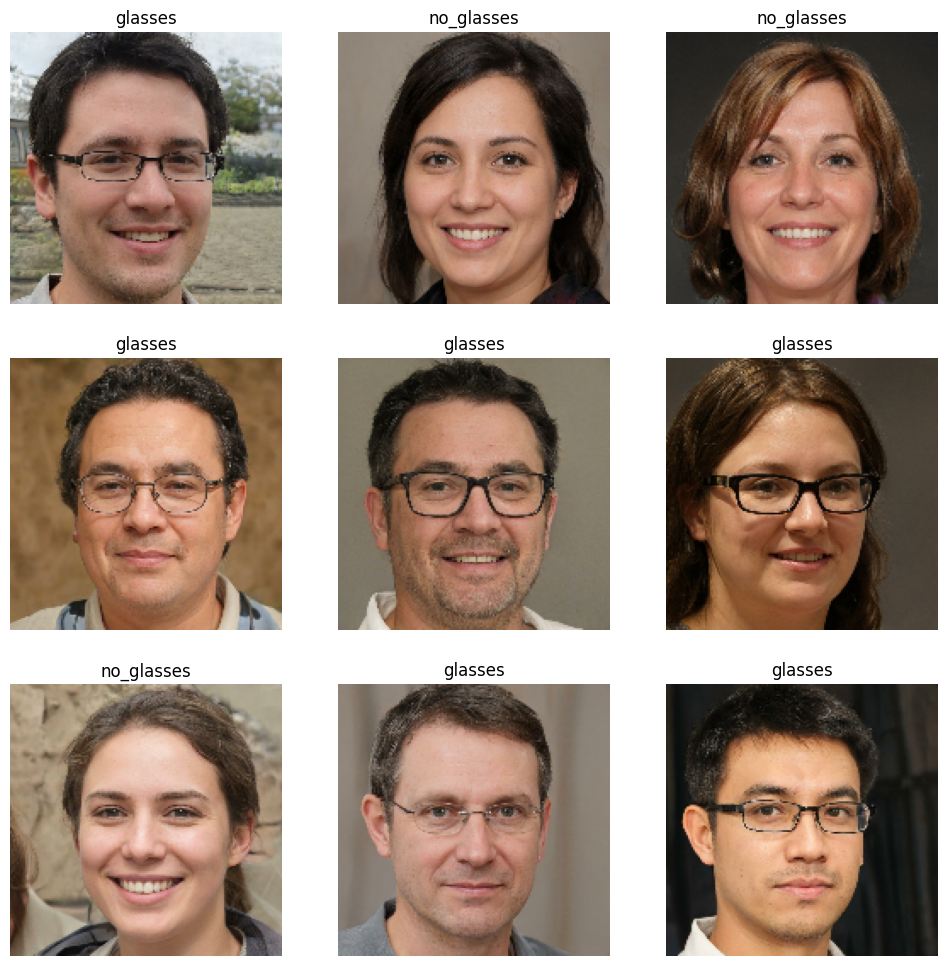

In [103]:
class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [104]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [105]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of training batches: 108
Number of validation batches: 38
Number of test batches: 9


In [106]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [107]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [108]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [109]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10


108/108 [==============================] - 50s 438ms/step - loss: 0.2499 - accuracy: 0.8653 - val_loss: 0.0386 - val_accuracy: 0.9916
Epoch 2/10
108/108 [==============================] - 43s 398ms/step - loss: 0.0148 - accuracy: 0.9959 - val_loss: 0.0189 - val_accuracy: 0.9958
Epoch 3/10
108/108 [==============================] - 44s 404ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0224 - val_accuracy: 0.9949
Epoch 4/10
108/108 [==============================] - 44s 404ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0119 - val_accuracy: 0.9975
Epoch 5/10
108/108 [==============================] - 44s 405ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0240 - val_accuracy: 0.9975
Epoch 6/10
108/108 [==============================] - 44s 405ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0105 - val_accuracy: 0.9983
Epoch 7/10
108/108 [==============================] - 44s 401ms/step - loss: 1.8982e-05 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy:

In [110]:
test_loss, test_acc = model.evaluate(test_dataset)
print('\nTest accuracy:', test_acc)

9/9 [==============================] - 1s 105ms/step - loss: 3.0226e-05 - accuracy: 1.0000

Test accuracy: 1.0


In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

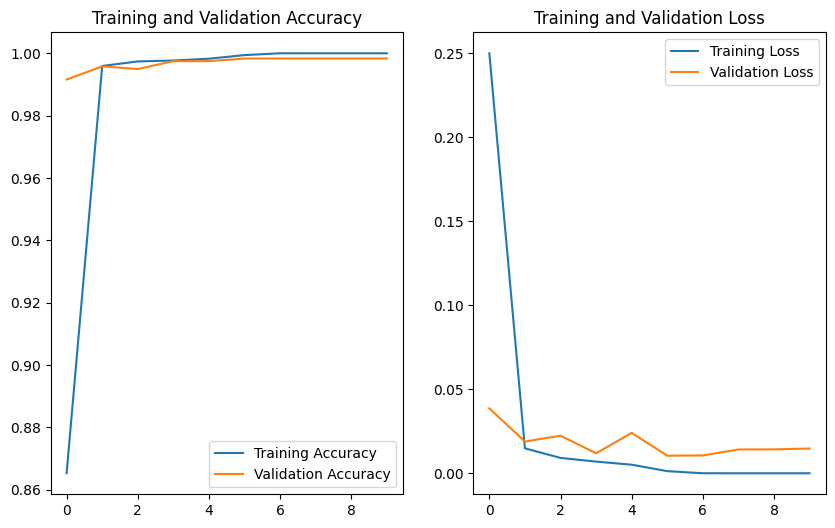

In [112]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()